In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np
from scipy.stats import norm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Obtenez le chemin complet du fichier dans votre Google Drive
# file_path = '/content/drive/MyDrive/CAS_Module2_presentation/hospital_cases.csv'
file_path = '/content/drive/MyDrive/CAS_Module2_presentation/hospital_cases_GMA.csv'

# Vérifiez si le fichier existe
if os.path.exists(file_path):
    # Faites ce que vous voulez avec le fichier, par exemple le lire avec pandas
    import pandas as pd
    df = pd.read_csv(file_path)
else:
    print("Le fichier n'existe pas.")

In [ ]:
#df = pd.read_csv('hospital_cases.csv')

Create Base DF

In [ ]:
df_noUni = df[df['Uni'] == 0]
df_Uni = df[df['Uni'] == 1]
df_Ro = df[(df['Reg'] == 'RO') & (df['Uni'] == 0)]
df_Al = df[(df['Reg'] == 'AL') & (df['Uni'] == 0)]

Df grouped by Year

In [ ]:
df_Uni_grp = df_Uni.groupby(['year']).sum()
df_Uni_grp['percentage_c-section'] = df_Uni_grp['cases_c-section']/df_Uni_grp['delivery']

df_noUni_grp = df_noUni.groupby(['year']).sum()
df_noUni_grp['percentage_c-section'] = df_noUni_grp['cases_c-section']/df_noUni_grp['delivery']

df_Ro_grp = df_Ro.groupby(['year']).sum()
df_Ro_grp['percentage_c-section'] = df_Ro_grp['cases_c-section']/df_Ro_grp['delivery']

df_Al_grp = df_Al.groupby(['year']).sum()
df_Al_grp['percentage_c-section'] = df_Al_grp['cases_c-section']/df_Al_grp['delivery']

<ipython-input-52-c0d1d801839f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Uni_grp = df_Uni.groupby(['year']).sum()
<ipython-input-52-c0d1d801839f>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_noUni_grp = df_noUni.groupby(['year']).sum()
<ipython-input-52-c0d1d801839f>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Ro_grp = df_Ro.groupby(['year']).sum()
<ipython-input-52-c0d1d801839f>:10: FutureWarni

University VS Standard

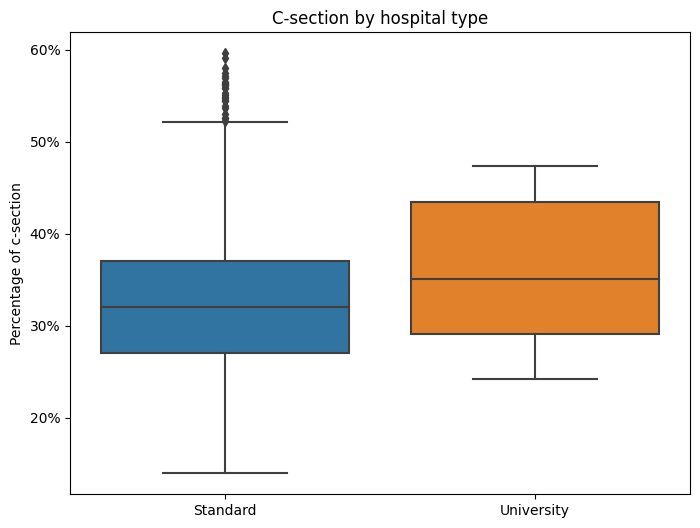

In [ ]:
# Créez un graphique à l'aide de Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Uni', y='percentage_c-section', data=df)

# Renommez les étiquettes de l'axe des abscisses
ax.set_xticklabels(['Standard', 'University'])

# Définissez un formateur personnalisé pour l'axe y en pourcentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.set_xlabel('')

plt.title('C-section by hospital type')

plt.ylabel('Percentage of c-section')
plt.show()

Western Switzerland VS German Switzerland

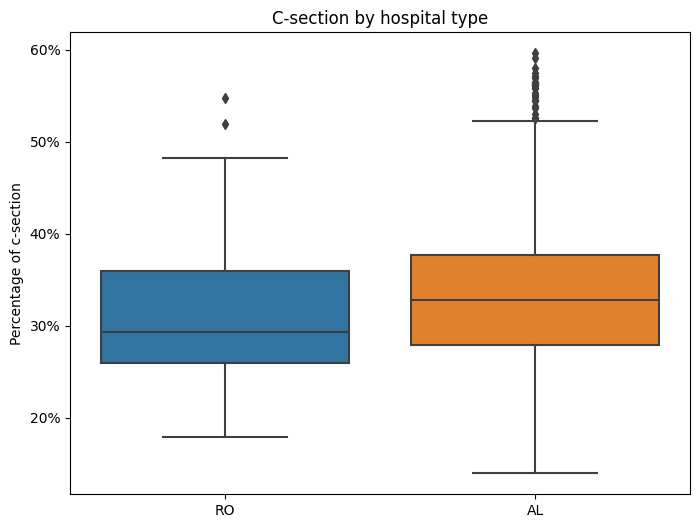

In [ ]:
# Créez un graphique à l'aide de Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Reg', y='percentage_c-section', data=df)

# Définissez un formateur personnalisé pour l'axe y en pourcentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.set_xlabel('')

plt.title('C-section by hospital type')

plt.ylabel('Percentage of c-section')
plt.show()

Graph by year

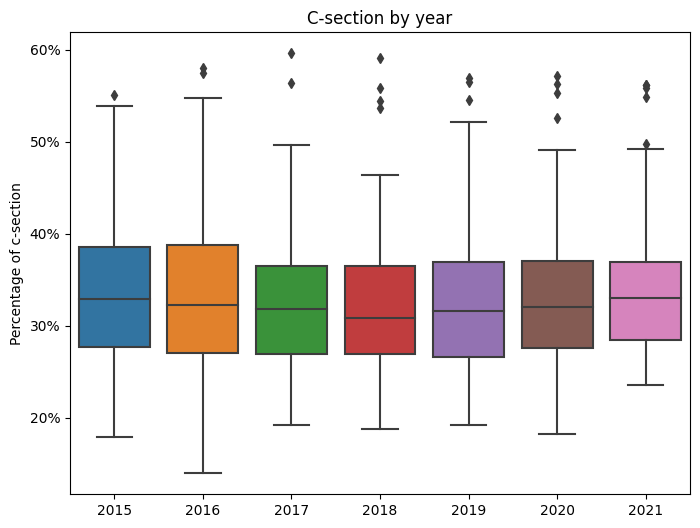

In [ ]:
# Créez un graphique à l'aide de Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='year', y='percentage_c-section', data=df)

# Définissez un formateur personnalisé pour l'axe y en pourcentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.set_xlabel('')

plt.title('C-section by year')

plt.ylabel('Percentage of c-section')
plt.show()

C-Section between Western CH and German CH

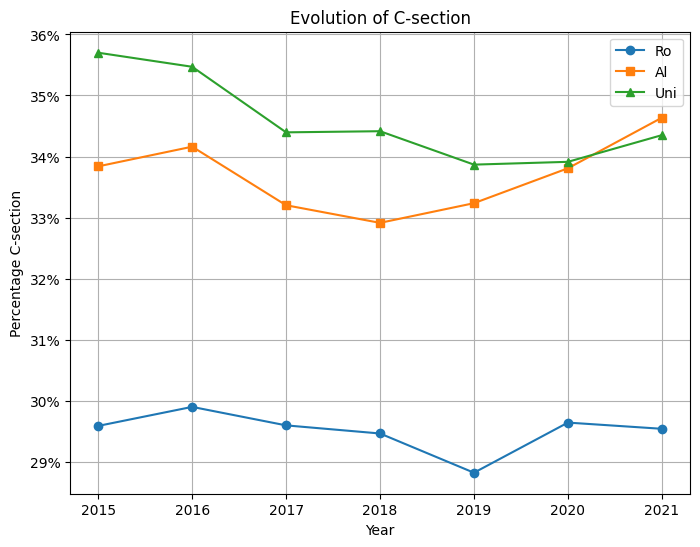

In [ ]:
# Créez un graphique en ligne
plt.figure(figsize=(8, 6))
plt.plot(df_Ro_grp.index, df_Ro_grp['percentage_c-section'], marker='o', linestyle='-', label='Ro')

# Ajoutez un deuxième graphique en ligne pour la deuxième série de données (autre_serie)
plt.plot(df_Al_grp.index, df_Al_grp['percentage_c-section'], marker='s', linestyle='-', label='Al')

# Ajoutez un deuxième graphique en ligne pour la deuxième série de données (autre_serie)
plt.plot(df_Uni_grp.index, df_Uni_grp['percentage_c-section'], marker='^', linestyle='-', label='Uni')

plt.title('Evolution of C-section')
plt.xlabel('Year')
plt.ylabel('Percentage C-section')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.grid(True)
plt.legend()
plt.show()


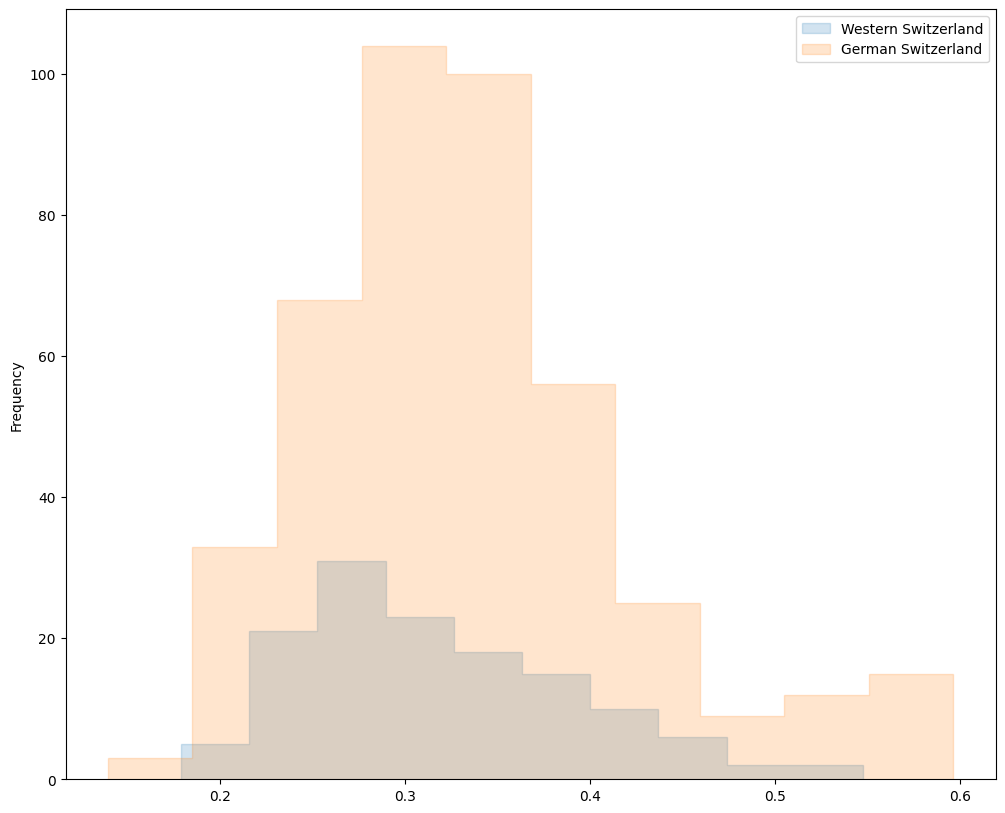

In [ ]:
datasets = [df_Ro['percentage_c-section'], df_Al['percentage_c-section']]
dataset_labels = ['Western Switzerland', 'German Switzerland']
plt.figure(figsize=(12,10))
i=0
for dataset in datasets[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
plt.legend()

In [ ]:
stats.skew(df_Ro['percentage_c-section'])

0.7059968849657039

In [ ]:
stats.skew(df_Al['percentage_c-section'])

0.8957842284458001

In [ ]:
stats.kurtosis(df_Ro['percentage_c-section'])

-0.03247233040579767

In [ ]:
stats.kurtosis(df_Al['percentage_c-section'])

0.8724563496475359

## Normality Test

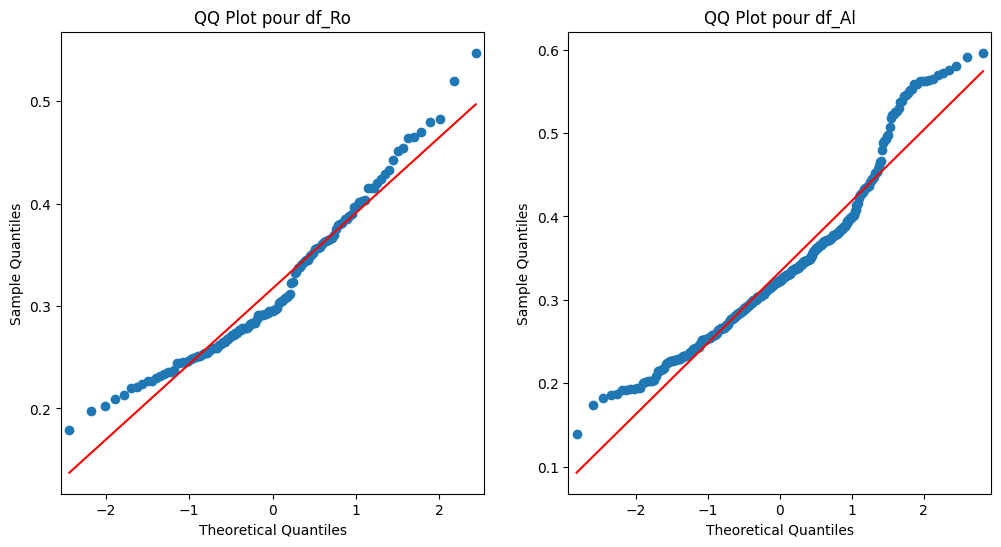

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df_Ro = df_Ro.dropna(subset=['percentage_c-section'])
df_Al = df_Al.dropna(subset=['percentage_c-section'])

sm.qqplot(df_Ro['percentage_c-section'], line='s', ax=ax1)
ax1.set_title('QQ Plot pour df_Ro')

sm.qqplot(df_Al['percentage_c-section'], line='s', ax=ax2)
ax2.set_title('QQ Plot pour df_Al')

plt.show()

It is hard to say that the distributions follow a normal one from the QQ plots

Let's try to test the normality of the distribution by using D'Agostino Pearson:

In [92]:
k2, p = stats.normaltest(df['percentage_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  5.074405077123035e-14
The null hypothesis (data follow a normal distribution) can be rejected


In [ ]:
k2, p = stats.normaltest(df_Ro['percentage_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  0.005897501075970454
The null hypothesis (data follow a normal distribution) cannot be rejected


In [ ]:
k2, p = stats.normaltest(df_Al['percentage_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  3.661160663685637e-12
The null hypothesis (data follow a normal distribution) can be rejected


## Analyse of the means

In [ ]:
df_Ro['percentage_c-section'].describe()

count    133.000000
mean       0.317111
std        0.074188
min        0.179032
25%        0.259259
50%        0.295597
75%        0.364486
max        0.547401
Name: percentage_c-section, dtype: float64

In [ ]:
df_Al['percentage_c-section'].describe()

count    425.000000
mean       0.333377
std        0.085233
min        0.139535
25%        0.277108
50%        0.322581
75%        0.371237
max        0.596239
Name: percentage_c-section, dtype: float64

Let's now test the hypothesis that the two samples have different means

### Mann–Whitney U test

In statistics, the Mann–Whitney U test is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.

The null hypothesis (H0) is that the two populations are equal.

The alternative hypothesis (H1) is that the two populations are not equal.

In [ ]:
f, p = stats.mannwhitneyu(df_Ro['percentage_c-section'],df_Al['percentage_c-section'], alternative='two-sided')
print("There is %1.2f probability that's the null hypothesis is wrong" % ((1-p)*100))

There is 95.18 probability that's the null hypothesis is wrong


In [ ]:
f, p = stats.mannwhitneyu(df_Uni['percentage_c-section'],df_noUni['percentage_c-section'], alternative='two-sided')
print("There is %1.2f probability that's the null hypothesis is wrong" % ((1-p)*100))

There is 98.18 probability that's the null hypothesis is wrong


In [ ]:
p

0.018170724125844816

We can compute the Kolmogorov-Smirnov statistic on 2 samples. This is a test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

In [ ]:
f, p = stats.ks_2samp(df_Ro['percentage_c-section'],df_Al['percentage_c-section'])
print("There is %1.2f probability that's the null hypothesis is wrong" % ((1-p)*100))

There is 99.67 probability that's the null hypothesis is wrong


**Interpretation:** It is unlikely that these sets come from the same population.

### ANOVA test

Python stats module provides a one-way Anova test. The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean (a generalisation of the t-test to more than two samples). The test is applied to samples from two or more groups, possibly with differing sizes.

In [ ]:
f, p_value = stats.f_oneway(df_Ro['percentage_c-section'],df_Al['percentage_c-section'])
print('One way Anova: p = %1.3f' % p_value)

One way Anova: p = 0.048


In [ ]:
f, p_value = stats.f_oneway(df_Uni['percentage_c-section'],df_noUni['percentage_c-section'])
print('One way Anova: p = %1.3f' % p_value)

One way Anova: p = 0.034


## Yearly Histogram

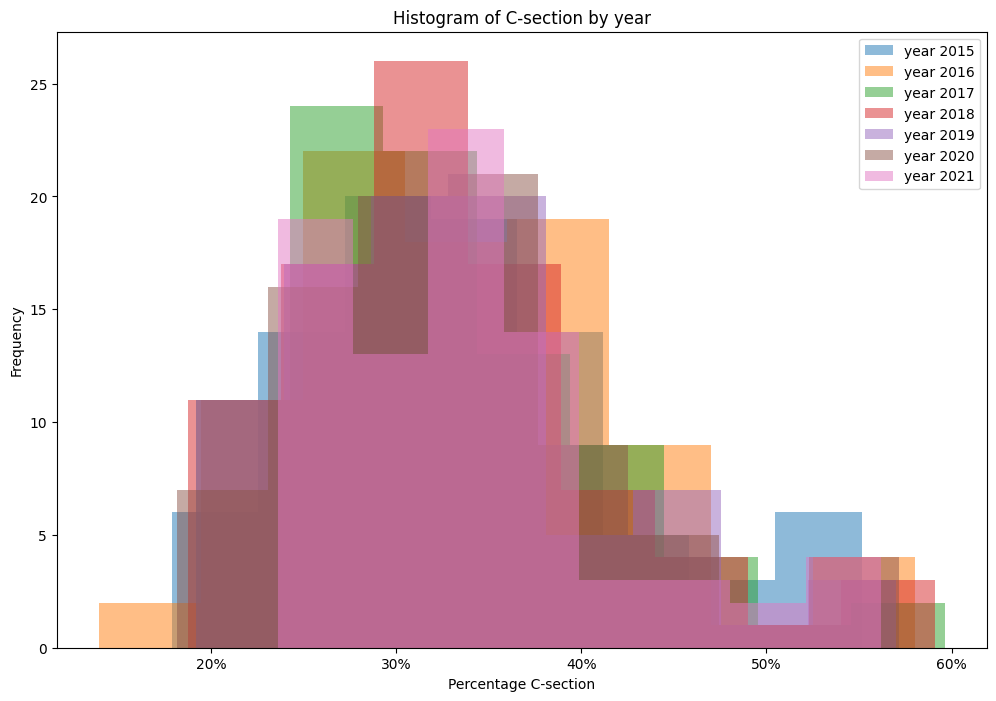

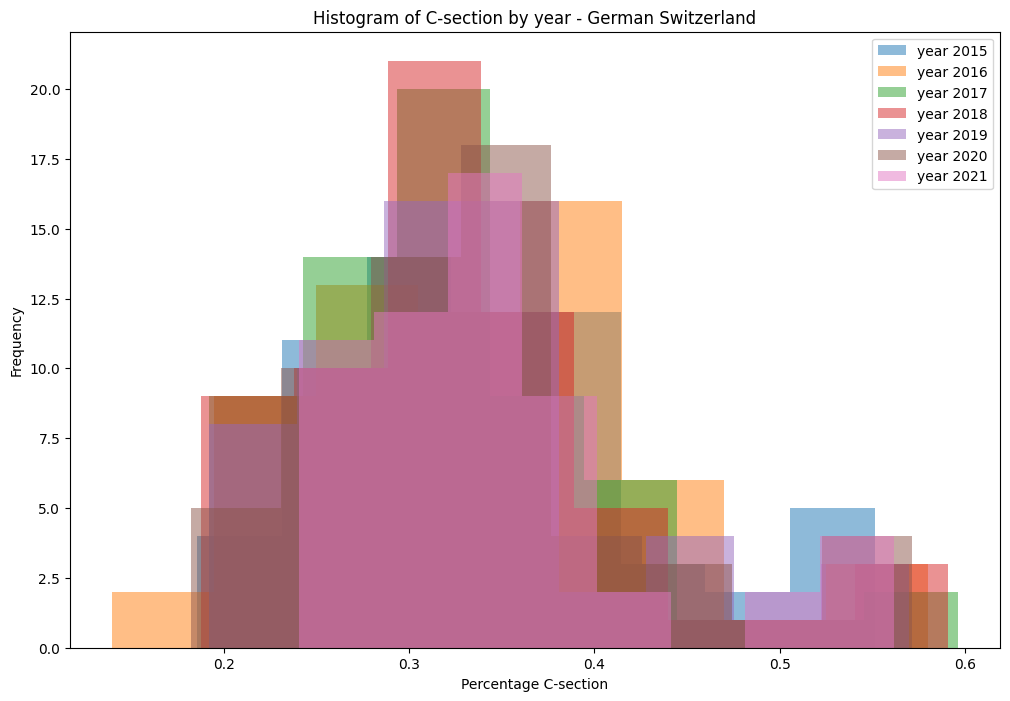

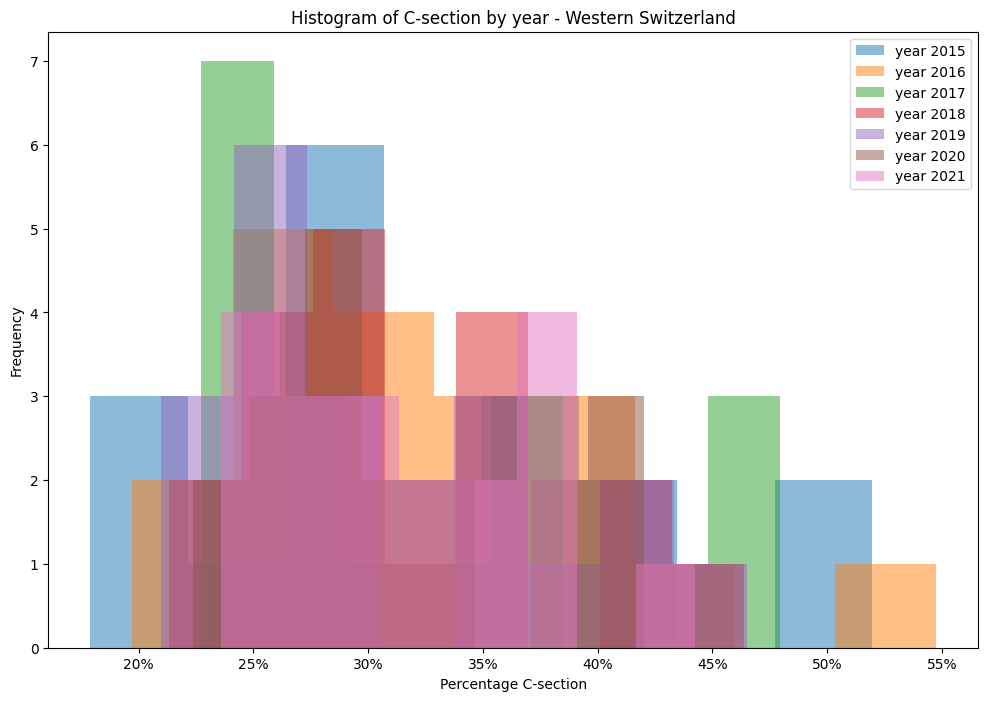

In [ ]:
years = df_Al['year'].unique()

####################### Switzerland ###########################################

# Créez un sous-graphique (subplot) pour tous les histogrammes
plt.figure(figsize=(12, 8))

# Parcourez chaque année et ajoutez un histogramme pour cette année sur le même graphique
for year in years:
    data_for_year = df[df['year'] == year]
    plt.hist(data_for_year['percentage_c-section'], bins=8, alpha=0.5, label=f'year {year}')

plt.title('Histogram of C-section by year')
plt.xlabel('Percentage C-section')
plt.ylabel('Frequency')
plt.legend()
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Affichez le graphique combiné
plt.show()

####################### German Switzerland ###########################################

# Créez un sous-graphique (subplot) pour tous les histogrammes
plt.figure(figsize=(12, 8))

# Parcourez chaque année et ajoutez un histogramme pour cette année sur le même graphique
for year in years:
    data_for_year = df_Al[df_Al['year'] == year]
    plt.hist(data_for_year['percentage_c-section'], bins=8, alpha=0.5, label=f'year {year}')

plt.title('Histogram of C-section by year - German Switzerland')
plt.xlabel('Percentage C-section')
plt.ylabel('Frequency')
plt.legend()

# Affichez le graphique combiné
plt.show()

####################### Western Switzerland ###########################################

years = df_Ro['year'].unique()
# Créez un sous-graphique (subplot) pour tous les histogrammes
plt.figure(figsize=(12, 8))

# Parcourez chaque année et ajoutez un histogramme pour cette année sur le même graphique
for year in years:
    data_for_year = df_Ro[df_Ro['year'] == year]
    plt.hist(data_for_year['percentage_c-section'], bins=8, alpha=0.5, label=f'year {year}')

plt.title('Histogram of C-section by year - Western Switzerland')
plt.xlabel('Percentage C-section')
plt.ylabel('Frequency')
plt.legend()
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Affichez le graphique combiné
plt.show()




In [ ]:
df.head()

,hospital,canton,delivery,year,cases_c-section,cases_kidney,Reg,Uni,percentage_c-section,to_delete,Doctor,Doctor_in_formation,Nurse,Other_Nurse,Total_staff,Operation_rooms,Delivery_rooms,Private_division,Beds
0,Les Hôpitaux Universitaires de Genève HUG,GE,4048,2015,1196.0,35.0,RO,1,0.295455,0,1676.08,NaN,4200.28,983.58,9936.21,38.0,7.0,0.0959,938.9
1,LUKS Spitalbetriebe AG,LU,2988,2015,982.0,NaN,AL,0,0.328648,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHUV Centre Hospitalier Universitaire Vaudois,VD,2909,2015,963.0,52.0,RO,1,0.331042,0,1586.90,NaN,3263.07,1578.87,9413.29,29.0,6.0,0.0726,888.0
3,Universitätsspital Zürich,ZH,2839,2015,1226.0,83.0,AL,1,0.431842,0,1205.53,NaN,2207.53,1049.24,6431.54,34.0,8.0,0.2013,947.4
4,Universitätsspital Basel,BS,2509,2015,912.0,80.0,AL,1,0.363491,0,877.81,NaN,1676.80,610.12,4764.80,24.0,5.0,0.2175,618.0


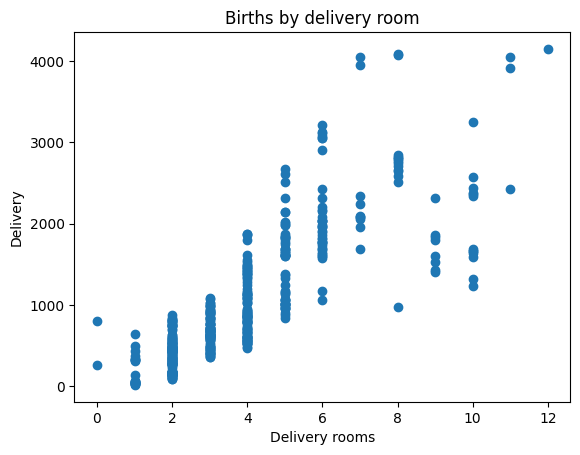

In [ ]:
# Créez un scatter plot
plt.scatter(df['Delivery_rooms'], df['delivery'])

# Ajoutez des étiquettes d'axe et un titre
plt.xlabel('Delivery rooms')
plt.ylabel('Delivery')
plt.title('Births by delivery room')
# Affichez le plot
plt.show()


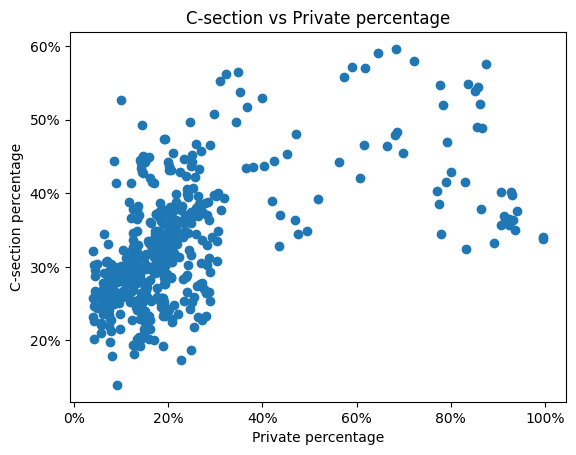

In [ ]:
# Créez un scatter plot
plt.scatter(df['Private_division'], df['percentage_c-section'])

# Ajoutez des étiquettes d'axe et un titre
plt.xlabel('Private percentage')
plt.ylabel('C-section percentage')
plt.title('C-section vs Private percentage')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Affichez le plot
plt.show()

# Use of log to get a normal distribution

In [ ]:
df_Ro['log_c-section'] = np.log(df_Ro['percentage_c-section']*100)
df_Al['log_c-section'] = np.log(df_Al['percentage_c-section']*100)
df['log_c-section'] = np.log(df['percentage_c-section']*100)

Text(0.5, 1.0, 'Histogram of Log C-section')

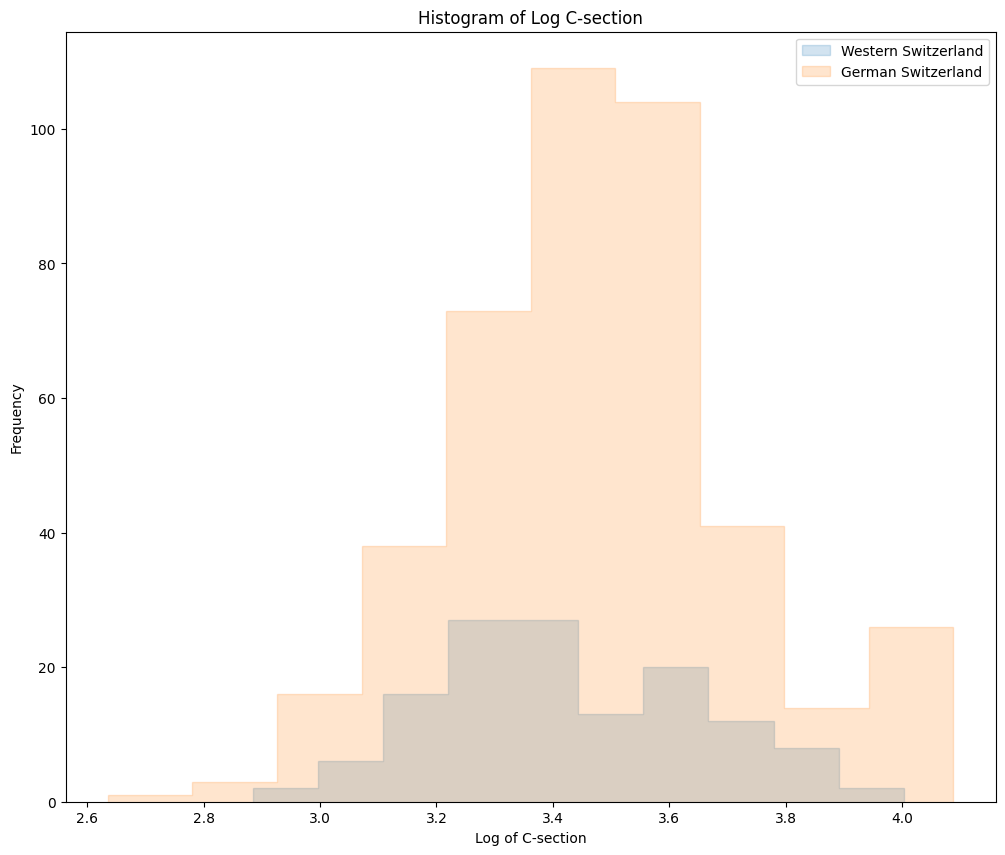

In [ ]:
datasets = [df_Ro['log_c-section'], df_Al['log_c-section']]
dataset_labels = ['Western Switzerland', 'German Switzerland']
plt.figure(figsize=(12,10))
i=0
for dataset in datasets[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
plt.legend()
plt.xlabel('Log of C-section')
plt.title('Histogram of Log C-section')

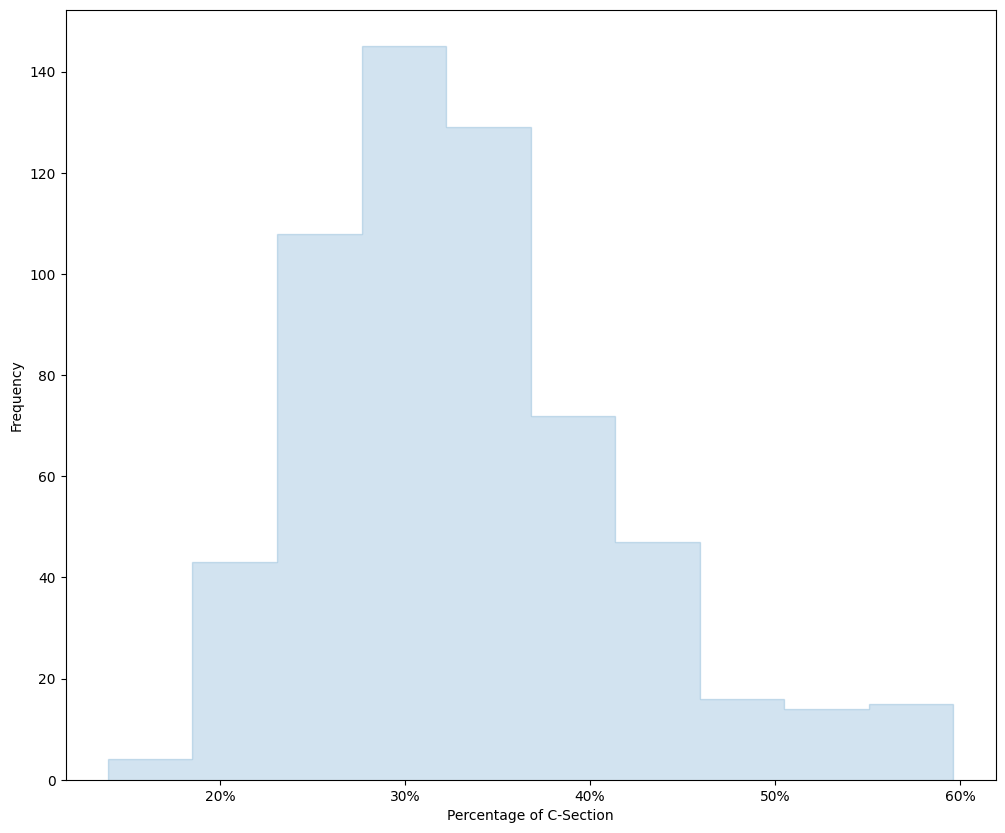

In [ ]:
plt.figure(figsize=(12,10))
df['percentage_c-section'].plot(kind="hist",fill=True,alpha=0.2,histtype='step')
plt.xlabel('Percentage of C-Section')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

In [ ]:
df['percentage_c-section'].describe()

count    593.000000
mean       0.331306
std        0.082824
min        0.139535
25%        0.271819
50%        0.320755
75%        0.372041
max        0.596239
Name: percentage_c-section, dtype: float64

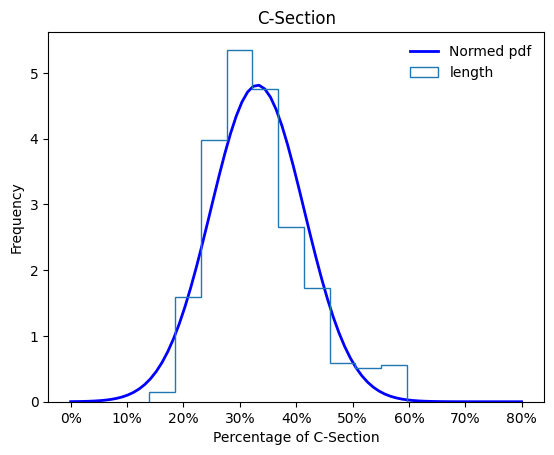

In [ ]:
# Create figure and axis
fig, ax = plt.subplots(1,1)
mean = df['percentage_c-section'].describe()[1]
sd = df['percentage_c-section'].describe()[2]
x = np.linspace(0,0.8,80)
ax.plot(x, norm.pdf(x,mean,sd),'b-', lw=2, label='Normed pdf')
df['percentage_c-section'].plot(kind="hist",fill=False,histtype='step',title='C-Section', label="length", density="True")
ax.legend(loc='best', frameon=False)
plt.xlabel('Percentage of C-Section')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.show()

Text(0.5, 1.0, 'Hisogram of the Log C-section')

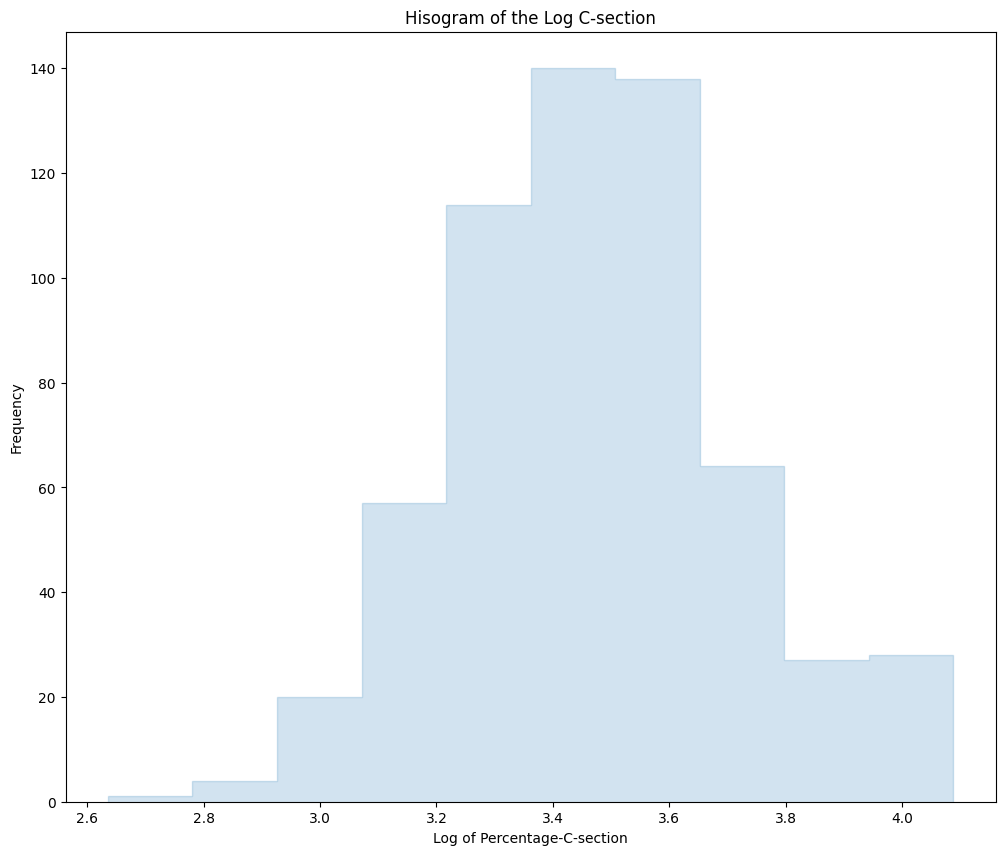

In [ ]:
plt.figure(figsize=(12,10))
df['log_c-section'].plot(kind="hist",fill=True,alpha=0.2,histtype='step')
plt.xlabel('Log of Percentage-C-section')
plt.title('Hisogram of the Log C-section')

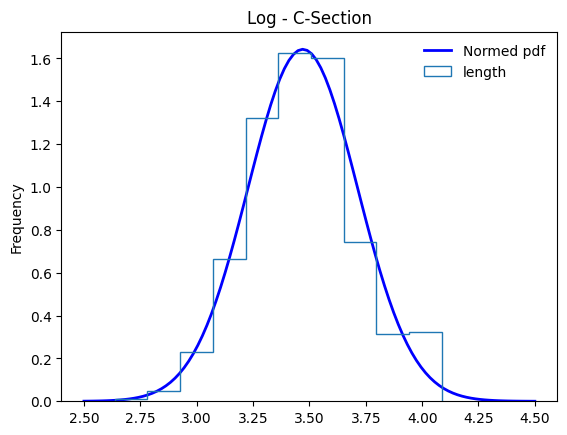

In [ ]:
# Create figure and axis
fig, ax = plt.subplots(1,1)
mean = df['log_c-section'].describe()[1]
sd = df['log_c-section'].describe()[2]
x = np.linspace(2.5,4.5,100)
ax.plot(x, norm.pdf(x,mean,sd),'b-', lw=2, label='Normed pdf')
df['log_c-section'].plot(kind="hist",fill=False,histtype='step',title='Log - C-Section', label="length", density="True")
ax.legend(loc='best', frameon=False)
plt.show()

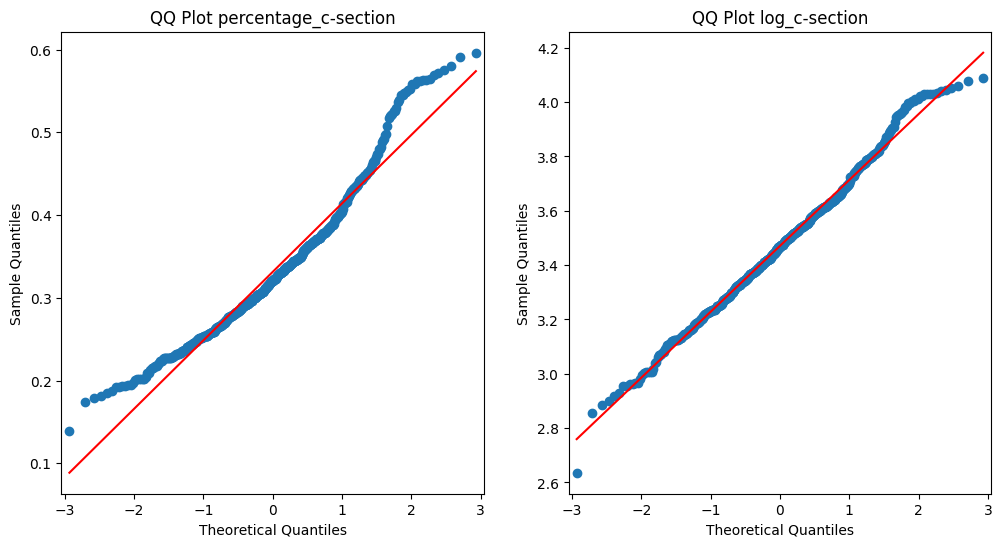

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sm.qqplot(df['percentage_c-section'], line='s', ax=ax1)
ax1.set_title('QQ Plot percentage_c-section')

sm.qqplot(df['log_c-section'], line='s', ax=ax2)
ax2.set_title('QQ Plot log_c-section')

plt.show()

In [ ]:
k2, p = stats.normaltest(df_Ro['log_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  0.15320390814506432
The null hypothesis (data follow a normal distribution) cannot be rejected


In [ ]:
k2, p = stats.normaltest(df_Al['log_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  0.3688645564829152
The null hypothesis (data follow a normal distribution) cannot be rejected


### Mann–Whitney U test

ability of X being greater than Y is equal to the probability of Y being greater than X.

The null hypothesis (H0) is that the two populations are equal.

The alternative hypothesis (H1) is that the two populations are not equal.

In [ ]:
f, p = stats.mannwhitneyu(df_Ro['log_c-section'],df_Al['log_c-section'], alternative='two-sided')
print("There is %1.2f probability that's the null hypothesis is wrong" % ((1-p)*100))

There is 95.18 probability that's the null hypothesis is wrong


### ANOVA

In [ ]:
f, p_value = stats.f_oneway(df_Ro['log_c-section'],df_Al['log_c-section'])
print('One way Anova: p = %1.3f' % p_value)

One way Anova: p = 0.062


### Welsch's t-test

In [ ]:
f, p  = stats.ttest_ind(df_Ro['log_c-section'],df_Al['log_c-section'], equal_var = False, alternative='two-sided') # False means we don't assume equal variances (Welsch's t-test)
print('Welsch''s t-test: p = %1.3f' % p)

Welschs t-test: p = 0.052
